In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.2 MB/s eta 0:00:00


In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [25]:
df_all = pd.read_csv("/continuous dataset.csv", parse_dates = ['datetime'], index_col = ['datetime'])

print("There are %0.0f" %df_all.shape[0] + " repeated measures and %0.0f" %df_all.shape[1] +" variables in the dataset" )

df_all.head()

There are 48048 repeated measures and 16 variables in the dataset


,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,
2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


In [26]:
df = df_all['nat_demand'].resample('W').sum()
df = df[1:273]
df

datetime
2015-01-11    181919.6224
2015-01-18    188082.3152
2015-01-25    179448.7184
2015-02-01    184393.4256
2015-02-08    187290.1846
                 ...     
2020-02-23    216005.1882
2020-03-01    204924.9816
2020-03-08    219065.4724
2020-03-15    216436.7037
2020-03-22    200434.6963
Freq: W-SUN, Name: nat_demand, Length: 272, dtype: float64

In [82]:
from statistics import mean

print("Max: ",max(df_all["nat_demand"]))
print("Mean: ",mean(df_all["nat_demand"]))
print("Min: ",min(df_all["nat_demand"]))

Max:  1754.882
Mean:  1182.8686472323864
Min:  85.19250000000002


<Axes: xlabel='datetime'>

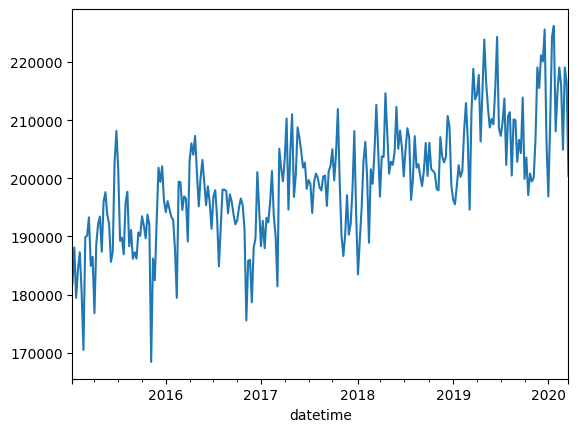

In [27]:
df.plot()

In [28]:
df_train = df[1:219]
df_test = df[219:273]

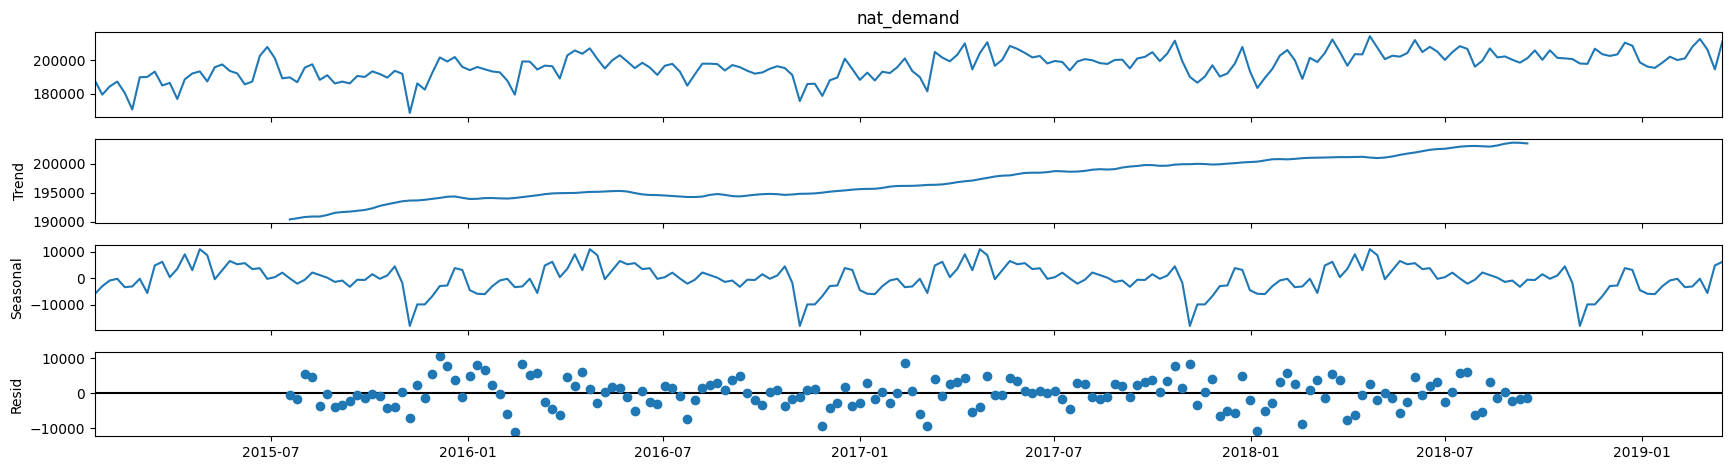

In [29]:
decomp = sm.tsa.seasonal_decompose(df_train,model = 'additive')
fig = decomp.plot()
fig.set_figwidth(20)


In [30]:
adf = adfuller(df_train)
print('adfuller test P-Value: ', adf[1])

adfuller test P-Value:  0.020741302189223345


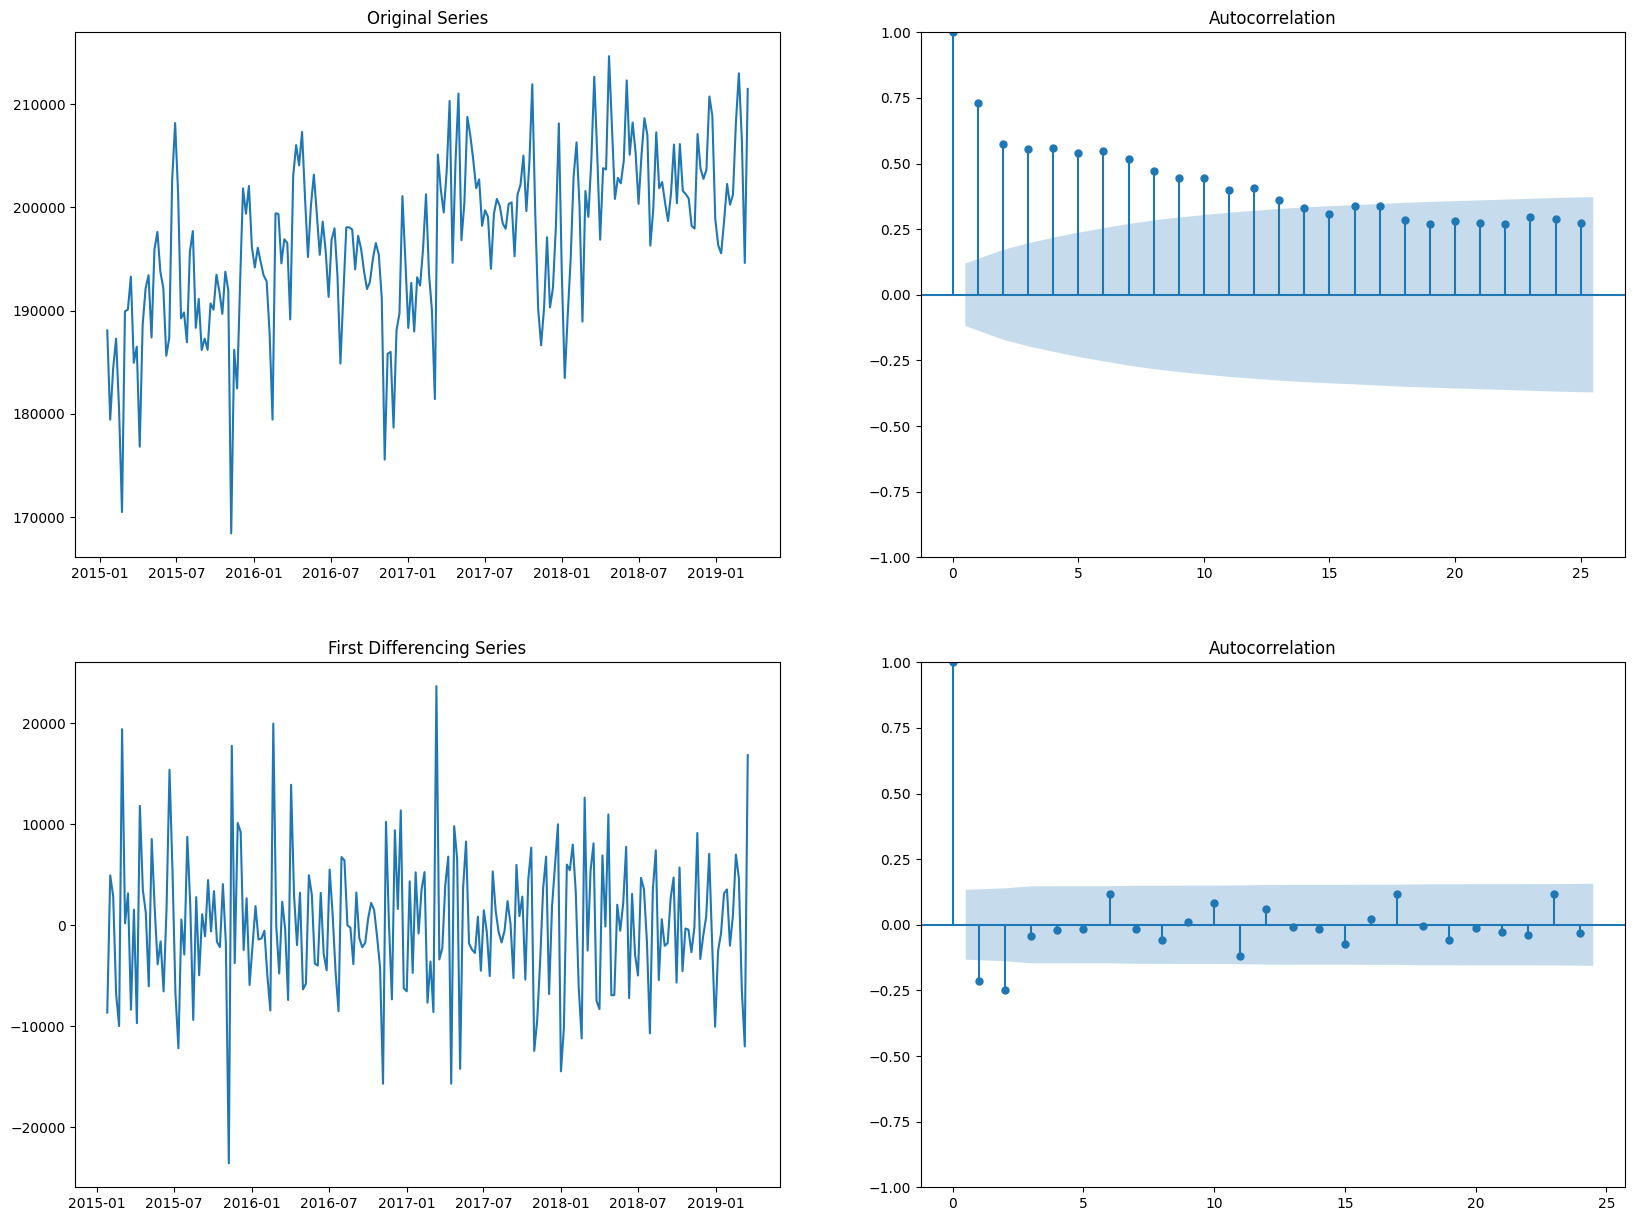

In [31]:
fig, axes = plt.subplots(2, 2, figsize = (20,15))
axes[0,0].plot(df_train)
axes[0,0].set_title('Original Series')
plot_acf(df, ax=axes[0,1])
axes[1,0].plot(df_train.diff())
axes[1,0].set_title('First Differencing Series')
plot_acf(df_train.diff().dropna(), ax=axes[1,1])
plt.show()

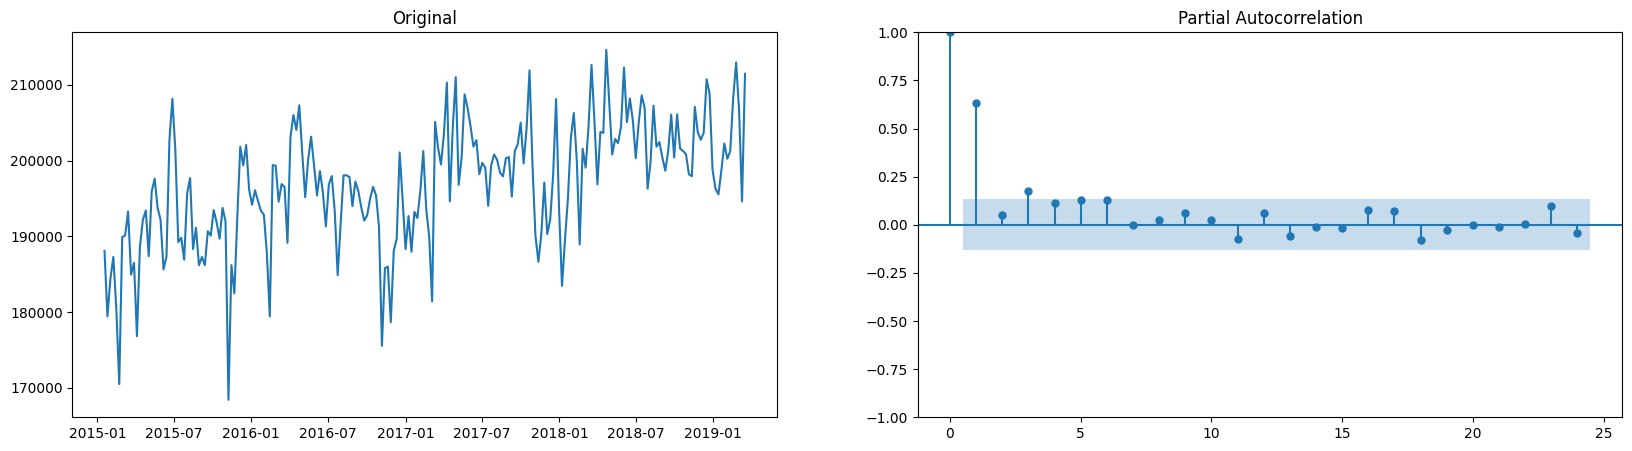

In [37]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))
axes[0].plot(df_train); axes[0].set_title('Original')
#axes[1].set(ylim=(0,5))
plot_pacf(df_train, ax=axes[1])

plt.show()

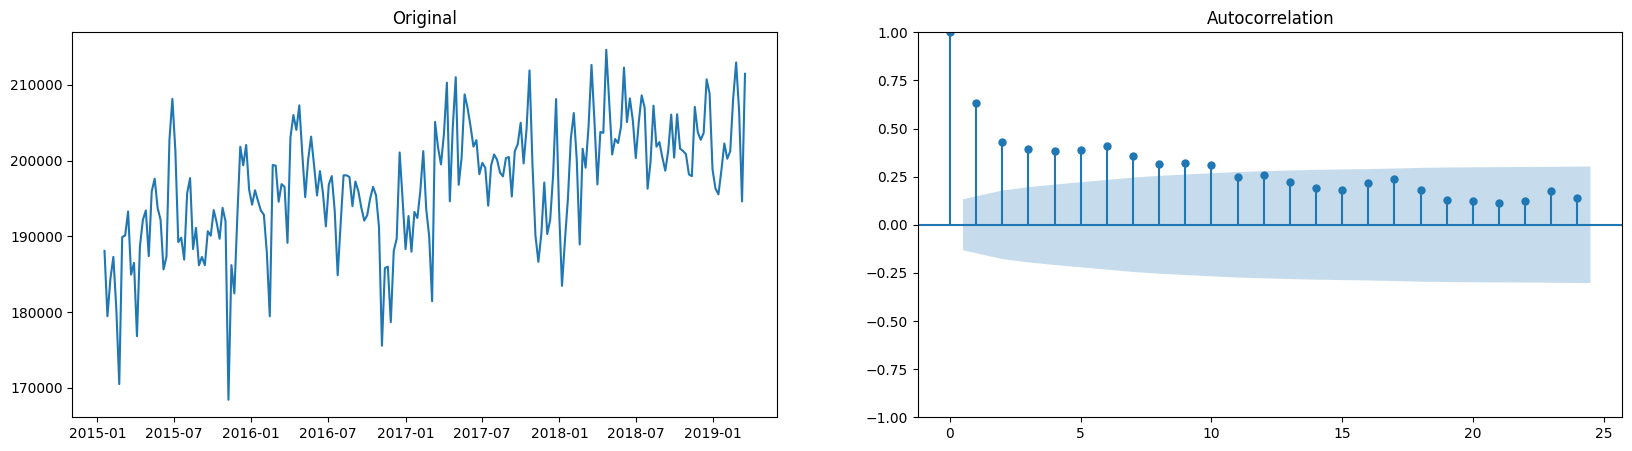

In [38]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))
axes[0].plot(df_train); axes[0].set_title('Original')
plot_acf(df_train, ax=axes[1])

plt.show()

In [39]:
model = ARIMA(df_train,exog = None, order = (1,0,2)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             nat_demand   No. Observations:                  218
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -2200.850
Date:                Fri, 29 Mar 2024   AIC                           4411.700
Time:                        10:22:56   BIC                           4428.622
Sample:                    01-18-2015   HQIC                          4418.535
                         - 03-17-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.968e+05   3712.062     53.026      0.000     1.9e+05    2.04e+05
ar.L1          0.9756      0.022     44.091      0.000       0.932       1.019
ma.L1         -0.4420      0.067     -6.631      0.000      -0.573      -0.311
ma.L2         -0.3202      0.069     -4.641      0.000      -0.455      -0.185
sigma2      3.315e+07      0.053   6.29e+08      0.000    3.32e+07    3.32e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                11.37
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                            -0.21
Prob(H) (two-sided):                  0.18   Kurtosis:                         4.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.58e+25. Standard errors may be unstable.
"""

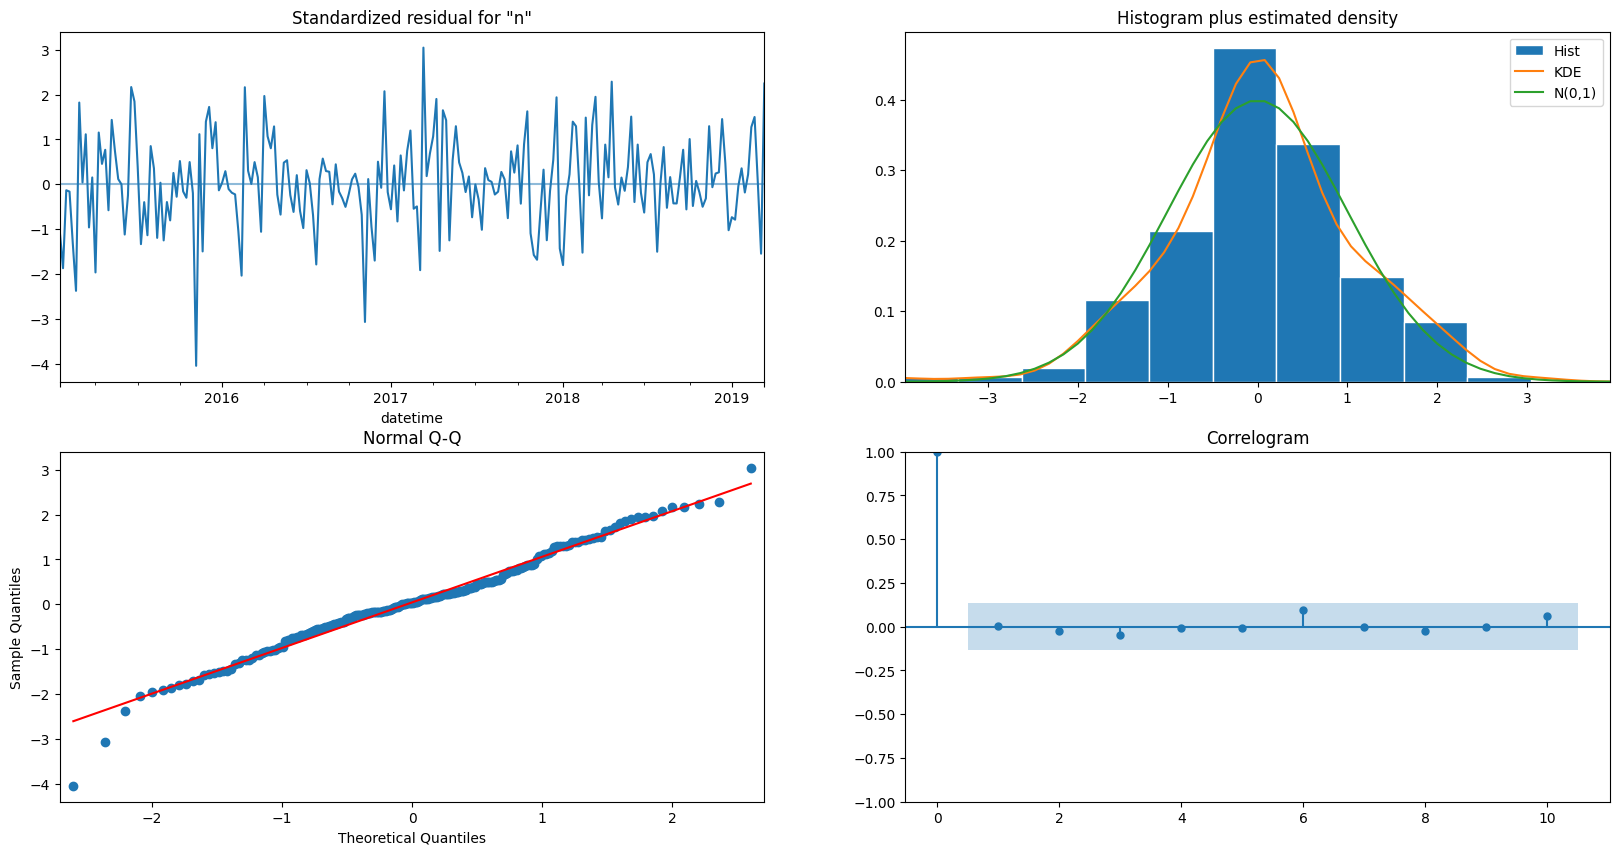

In [40]:
model.plot_diagnostics(figsize=(20,10))
plt.show()

In [41]:
pred = model.predict(start = len(df_train),end = len(df)-2)
print("The Root Mean Squared Error is: "+ str(np.sqrt(mean_squared_error(df_test,pred))))

The Root Mean Squared Error is: 12745.584882387127


<Axes: xlabel='datetime'>

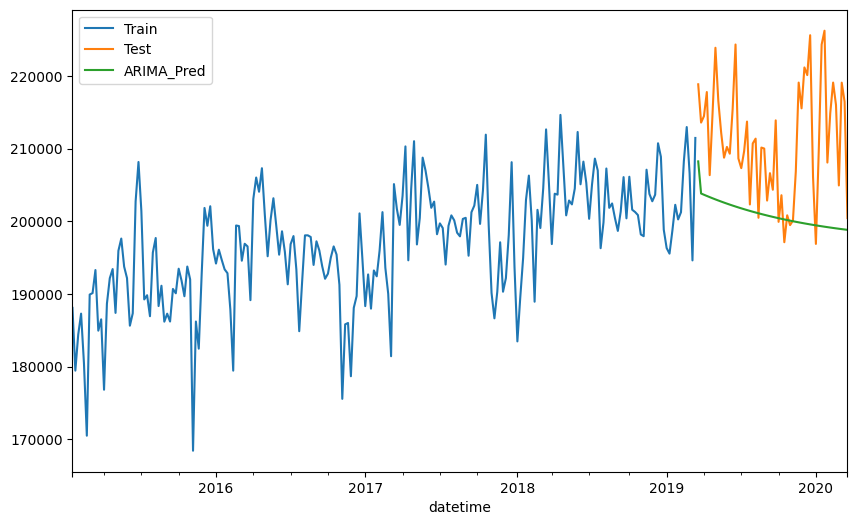

In [42]:
df_train.plot(legend = True,label = 'Train', figsize=(10,6))
df_test.plot(legend = True,label = 'Test')
pred.plot(legend = True,label = 'ARIMA_Pred')

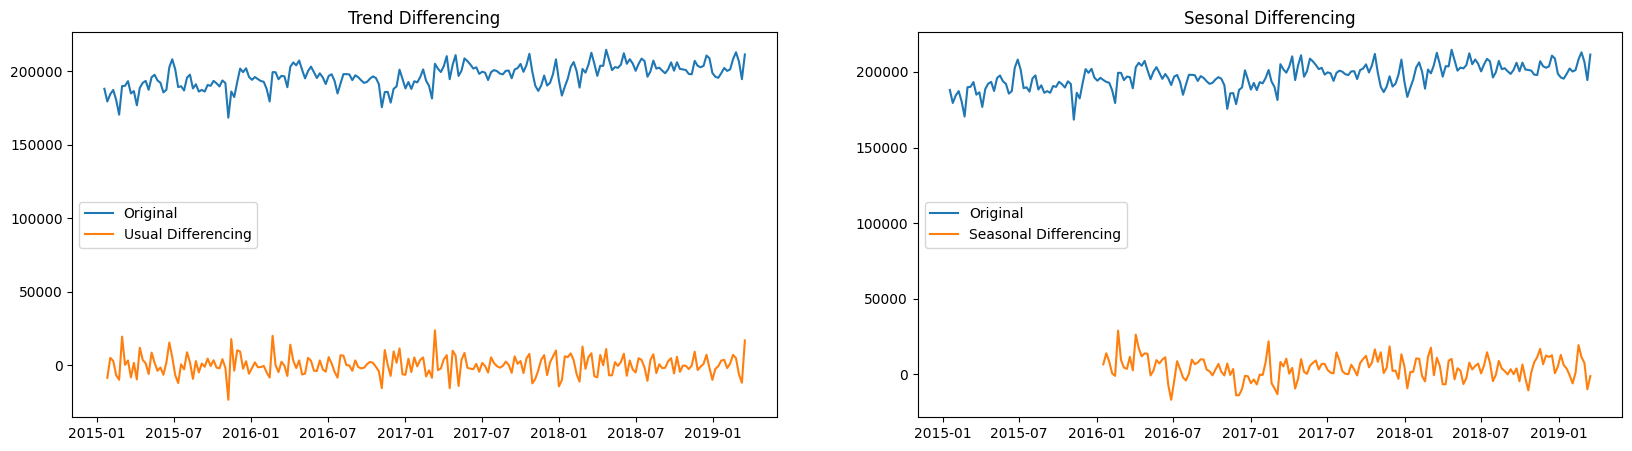

In [43]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))
axes[0].plot(df_train, label= 'Original')
axes[0].plot(df_train.diff(1), label= 'Usual Differencing')
axes[0].set_title('Trend Differencing')
axes[0].legend(loc='center left', fontsize=10)
axes[1].plot(df_train, label= 'Original')
axes[1].plot(df_train.diff(52), label= 'Seasonal Differencing')
axes[1].set_title('Sesonal Differencing')
axes[1].legend(loc='center left', fontsize=10)
plt.show()

In [44]:
arima= auto_arima(df_train,trace=True, error_action='ignore', test = 'adf',
                         start_p=1,start_q=1,max_p=10,max_q=10,m=1, D=0,
                   suppress_warnings=True,stepwise=True,seasonal=False)
arima.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4439.281, Time=0.59 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5935.911, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5780.440, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4425.676, Time=0.81 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=4421.632, Time=1.15 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.71 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=4446.972, Time=1.11 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=1.18 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.32 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=0.32 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=0.62 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=4424.894, Time=0.51 sec

Best model:  ARIMA(3,0,1)(0,0,0)[0]          
Total fit time: 7.970

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  218
Model:               SARIMAX(3, 0, 1)   Log Likelihood               -2205.816
Date:                Fri, 29 Mar 2024   AIC                           4421.632
Time:                        10:26:13   BIC                           4438.555
Sample:                    01-18-2015   HQIC                          4428.467
                         - 03-17-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3656      0.087     15.718      0.000       1.195       1.536
ar.L2         -0.5351      0.123     -4.366      0.000      -0.775      -0.295
ar.L3          0.1695      0.090      1.879      0.060      -0.007       0.346
ma.L1         -0.8198      0.068    -11.981      0.000      -0.954      -0.686
sigma2      3.966e+07   6.78e-10   5.85e+16      0.000    3.97e+07    3.97e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 7.32
Prob(Q):                              0.79   Prob(JB):                         0.03
Heteroskedasticity (H):               0.72   Skew:                            -0.11
Prob(H) (two-sided):                  0.16   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.82e+32. Standard errors may be unstable.
"""

In [48]:
df_exo = df_all.resample('W').sum().iloc[:,1:]
exo_train = df_exo[2:220]
exo_test = df_exo[220:273]

In [49]:
arimax= auto_arima(df_train,trace=True, X = exo_train[['T2M_toc','TQL_toc','QV2M_san','QV2M_dav','holiday']]
                   , error_action='ignore', test = 'adf', approximation=False
                   , start_p=0,start_q=0,max_p=10,max_q=10,m=1, D=0,
                   suppress_warnings=True,stepwise=True,seasonal=False)
arimax.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5464.301, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4282.008, Time=0.49 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4387.906, Time=1.28 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=4269.989, Time=1.05 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=4261.630, Time=0.82 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=4258.813, Time=0.57 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=4255.799, Time=0.68 sec
 ARIMA(6,0,0)(0,0,0)[0]             : AIC=4257.615, Time=1.67 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=4252.409, Time=2.27 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=4250.952, Time=1.02 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=4249.808, Time=0.89 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4247.665, Time=1.96 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4253.358, Time=2.05 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=4248.961, Time=2.57 sec
 ARIMA(1,0,2)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  218
Model:               SARIMAX(1, 0, 2)   Log Likelihood               -2114.776
Date:                Fri, 29 Mar 2024   AIC                           4247.552
Time:                        10:34:04   BIC                           4278.013
Sample:                    01-18-2015   HQIC                          4259.856
                         - 03-17-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
T2M_toc       43.4804      2.212     19.653      0.000      39.144      47.817
TQL_toc     -337.0734     63.729     -5.289      0.000    -461.980    -212.167
QV2M_san    4.081e+04   5842.900      6.985      0.000    2.94e+04    5.23e+04
QV2M_dav   -4.255e+04   7221.493     -5.892      0.000   -5.67e+04   -2.84e+04
holiday     -152.5739     11.533    -13.229      0.000    -175.179    -129.969
ar.L1          0.9939      0.011     89.352      0.000       0.972       1.016
ma.L1         -0.5359      0.075     -7.138      0.000      -0.683      -0.389
ma.L2         -0.2179      0.071     -3.048      0.002      -0.358      -0.078
sigma2      1.564e+07     16.978   9.21e+05      0.000    1.56e+07    1.56e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.71
Prob(Q):                              0.96   Prob(JB):                         0.43
Heteroskedasticity (H):               1.27   Skew:                             0.14
Prob(H) (two-sided):                  0.31   Kurtosis:                         2.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.57e+21. Standard errors may be unstable.
"""

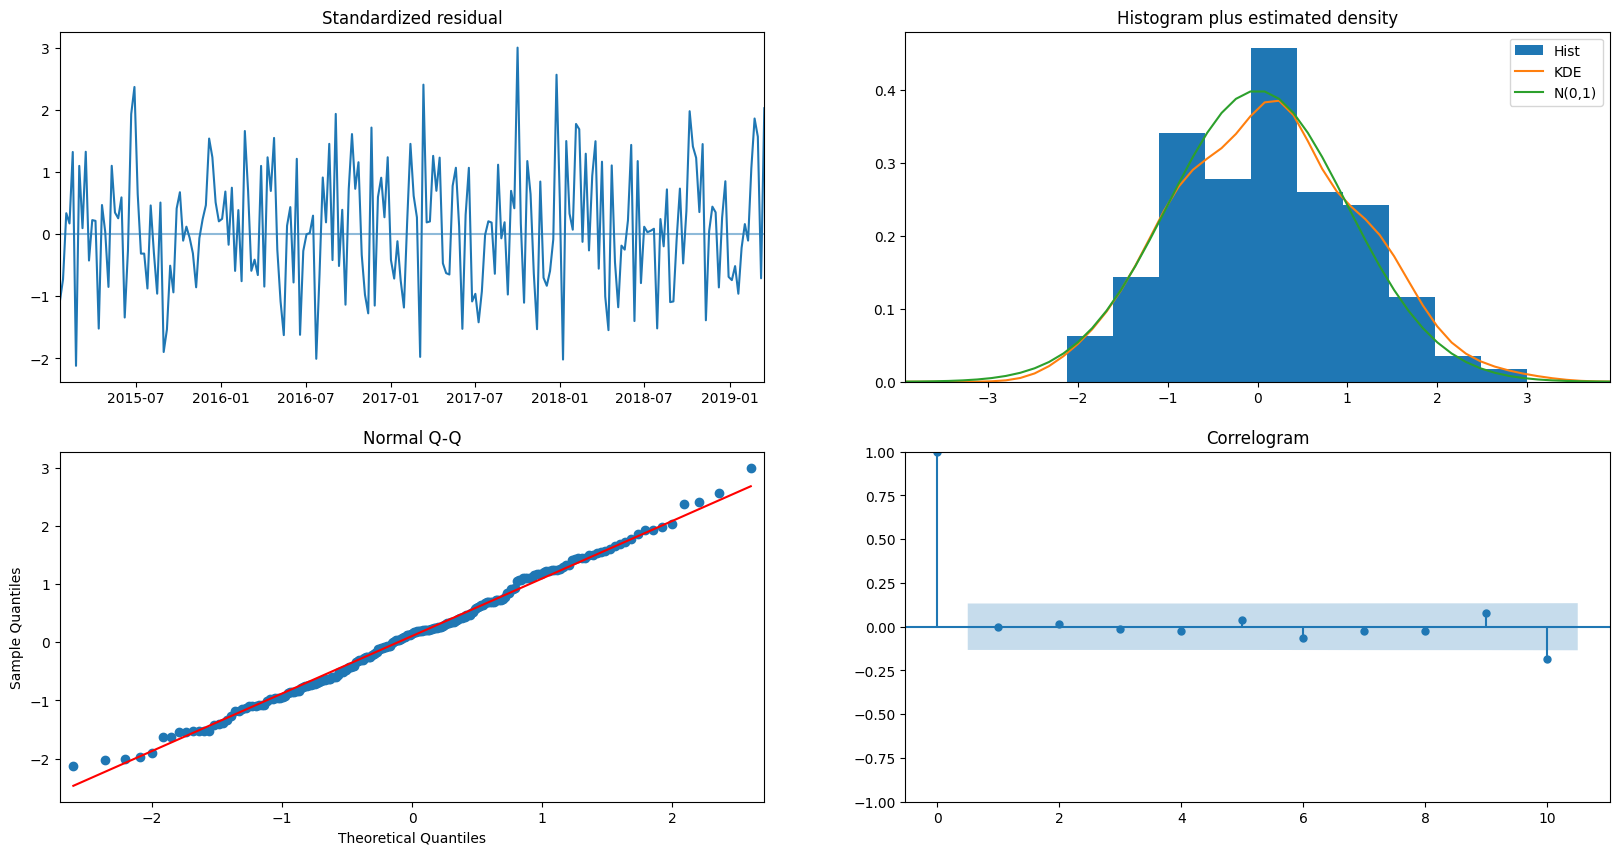

In [50]:
arimax.plot_diagnostics(figsize=(20,10))
plt.show()

<Axes: xlabel='datetime'>

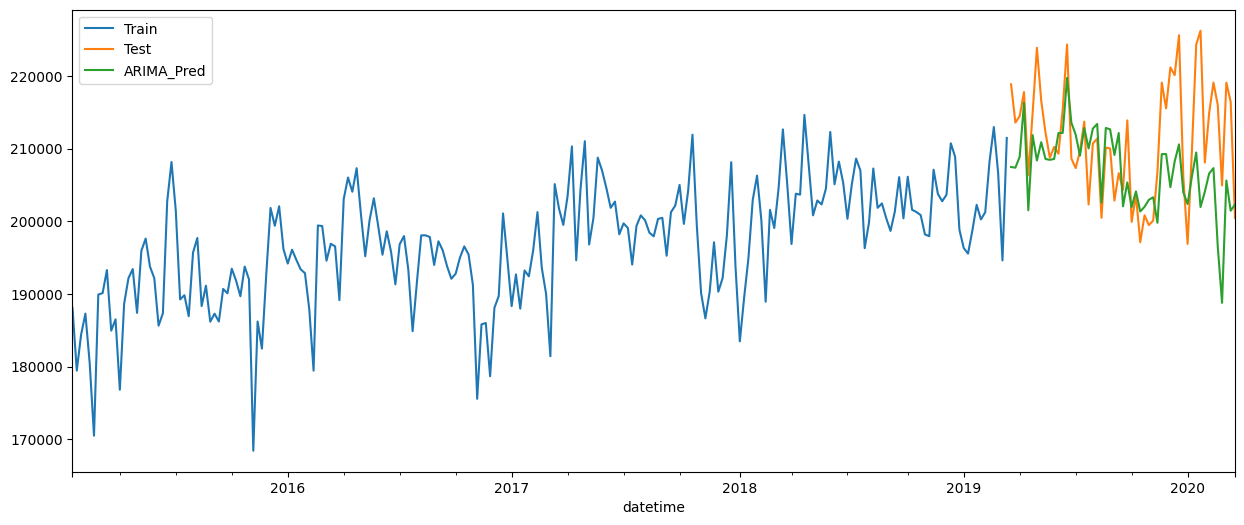

In [55]:
pred_x = arimax.predict(n_periods = len(df_test),X = exo_test[['T2M_toc','TQL_toc','QV2M_san','QV2M_dav','holiday']] )
df_train.plot(legend = True,label = 'Train', figsize=(15,6))
df_test.plot(legend = True,label = 'Test')
pred_x.plot(legend = True,label = 'ARIMA_Pred')

In [57]:
print("The Root Mean Squared Error is: "+ str(np.sqrt(mean_squared_error(df_test,pred_x))))

The Root Mean Squared Error is: 8515.136350323046


<Axes: xlabel='datetime'>

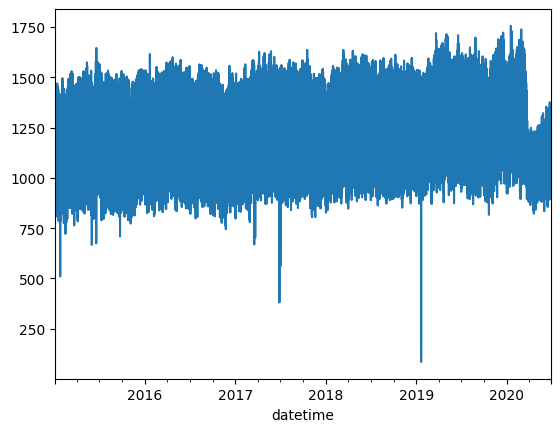

In [60]:
df_all["nat_demand"].plot()